## Install libraries and Env Setup

In [1]:
%%capture
!pip install llama-index openai

In [ ]:
import os
# https://platform.openai.com/account/api-keys
os.environ["OPENAI_API_KEY"] = "YOUR API KEY"

## Implementation

In [3]:
# Import necessary packages
from llama_index.llms.openai import OpenAI
from llama_index.core import VectorStoreIndex,SimpleDirectoryReader
from IPython.display import Markdown, display

In [4]:
#VectorStoreIndex??
#SimpleDirectoryReader??

In [5]:
import os
import subprocess

# Specify the URL of the PDF file you want to download
pdf_url = "https://browse.arxiv.org/pdf/1706.03762.pdf"

# Specify the directory where you want to save the PDF file
download_dir = "data"

# Specify the desired new name for the downloaded PDF file
new_filename = "attention-is-all-you-need.pdf"

# Create the directory if it doesn't exist
if not os.path.exists(download_dir):
    os.makedirs(download_dir)

# Use wget to download the PDF file into the directory
command = f"wget -P {download_dir} {pdf_url}"

# Execute the wget command using subprocess
try:
    subprocess.run(command, shell=True, check=True)
    print(f"PDF downloaded successfully to {download_dir}")

    # Rename the downloaded file to the desired name
    old_filepath = os.path.join(download_dir, os.path.basename(pdf_url))
    new_filepath = os.path.join(download_dir, new_filename)
    os.rename(old_filepath, new_filepath)
    print(f"PDF renamed to {new_filename}")
except subprocess.CalledProcessError as e:
    print(f"Error: {e}")

PDF downloaded successfully to data
PDF renamed to attention-is-all-you-need.pdf


In [6]:
%%capture
!pip install pypdf

## Load documents and build index

In [7]:
#document loader
documents = SimpleDirectoryReader("data").load_data()

In [8]:
len(documents)

15

In [9]:
documents[0]

Document(id_='4fb4af53-35da-49a3-ba77-5547ba7908f8', embedding=None, metadata={'page_label': '1', 'file_name': 'attention-is-all-you-need.pdf', 'file_path': '/content/data/attention-is-all-you-need.pdf', 'file_type': 'application/pdf', 'file_size': 2215244, 'creation_date': '2024-09-14', 'last_modified_date': '2024-04-12'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={}, text='Provided proper attribution is provided, Google hereby grants permission to\nreproduce the tables and figures in this paper solely for use in journalistic or\nscholarly works.\nAttention Is All You Need\nAshish Vaswani∗\nGoogle Brain\navaswani@google.comNoam Shazeer∗\nGoogle Brain\nnoam@google.comNiki Parmar∗\nGoogle Research\nnikip@google.comJakob Uszkoreit∗\nGoogle Research\nusz@google

[LlamaIndex Vector Store Index](https://gpt-index.readthedocs.io/en/latest/core_modules/data_modules/index/vector_store_guide.html)

In [10]:
# build index/vectorstore (document splitting, embedding, storing embeddings + chunks)
index = VectorStoreIndex.from_documents(documents)

### Query
Start querying by getting the default query engine

In [11]:
query_engine = index.as_query_engine() #no history preserved

In [12]:
response = query_engine.query("What is the paper about ?")

In [13]:
response

Response(response='The paper discusses the behavior of attention heads in a neural network model, particularly focusing on their involvement in tasks like anaphora resolution and sentence structure analysis.', source_nodes=[NodeWithScore(node=TextNode(id_='3a4252ab-cea0-4445-b66e-9335dfb9517d', embedding=None, metadata={'page_label': '14', 'file_name': 'attention-is-all-you-need.pdf', 'file_path': '/content/data/attention-is-all-you-need.pdf', 'file_type': 'application/pdf', 'file_size': 2215244, 'creation_date': '2024-09-14', 'last_modified_date': '2024-04-12'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='a33b5c36-3435-4672-9026-113b01a31f70', node_type=<ObjectType.DOCUMENT: '4'>, metadata={'page_label

In [14]:
display(Markdown(f"<b>{response}</b>"))

<b>The paper discusses the behavior of attention heads in a neural network model, particularly focusing on their involvement in tasks like anaphora resolution and sentence structure analysis.</b>

### Storing and Loading the Index

In [15]:
index.storage_context.persist()

In [16]:
from llama_index.core import StorageContext, load_index_from_storage

storage_context = StorageContext.from_defaults(persist_dir="./storage")
index = load_index_from_storage(storage_context=storage_context)

## We used the default one,  How to Customize It ??
[Customizing LLms within LlamaIndex](https://gpt-index.readthedocs.io/en/latest/core_modules/model_modules/llms/usage_custom.html)

In [25]:
from llama_index.core import ServiceContext, set_global_service_context
from llama_index.llms.openai import OpenAI
# alternatively
# from langchain.llms import ...
!pip install llama-index qdrant_client torch transformers
!pip install llama-index-llms-ollama
!pip install llama-index-embeddings-huggingface

In [24]:
from llama_index.llms.ollama import Ollama

from llama_index.embeddings.huggingface import HuggingFaceEmbedding
from llama_index.core import Settings

Settings.llm = Ollama(model="llama2", request_timeout=120.0)
Settings.embed_model = HuggingFaceEmbedding(
    model_name="BAAI/bge-small-en-v1.5"
)
from llama_index.embeddings.openai import OpenAIEmbedding
from llama_index.core.node_parser import SentenceSplitter
from llama_index.llms.openai import OpenAI
from llama_index.core import Settings

Settings.llm = OpenAI(model="gpt-3.5-turbo")
Settings.embed_model = OpenAIEmbedding(model="text-embedding-3-small")
Settings.node_parser = SentenceSplitter(chunk_size=512, chunk_overlap=20)
Settings.num_output = 512
Settings.context_window = 3900
# a document summary index needs both an llm and embed model
# for the constructor
# a vector store index only needs an embed model
index = VectorStoreIndex.from_documents(documents)



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 861.9/861.9 kB 39.4 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/94.8k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [26]:
query_engine = index.as_query_engine(streaming=True)
response = query_engine.query("What is the paper about ?")
response.print_response_stream()

The paper is about analyzing attention mechanisms in neural networks, specifically focusing on the behavior of attention heads in an encoder self-attention model.

## Using LLM From HuggingFace [LINK](https://gpt-index.readthedocs.io/en/latest/core_modules/model_modules/llms/usage_custom.html#example-using-a-huggingface-llm)

In [1]:
!pip install llama-index-embeddings-huggingface
!pip install llama-index-llms-huggingface

In [2]:
from llama_index.llms.huggingface import HuggingFaceLLM
from llama_index.core import PromptTemplate

system_prompt = """<|SYSTEM|># StableLM Tuned (Alpha version)
- StableLM is a helpful and harmless open-source AI language model developed by StabilityAI.
- StableLM is excited to be able to help the user, but will refuse to do anything that could be considered harmful to the user.
- StableLM is more than just an information source, StableLM is also able to write poetry, short stories, and make jokes.
- StableLM will refuse to participate in anything that could harm a human.
"""

# This will wrap the default prompts that are internal to llama-index
query_wrapper_prompt = PromptTemplate("<|USER|>{query_str}<|ASSISTANT|>")

import torch
from llama_index.llms.huggingface import HuggingFaceLLM
llm = HuggingFaceLLM(
    context_window=4096,
    max_new_tokens=256,
    generate_kwargs={"temperature": 0.7, "do_sample": False},
    system_prompt=system_prompt,
    query_wrapper_prompt=query_wrapper_prompt,
    tokenizer_name="StabilityAI/stablelm-tuned-alpha-3b",
    model_name="StabilityAI/stablelm-tuned-alpha-3b",
    device_map="auto",
    stopping_ids=[50278, 50279, 50277, 1, 0],
    tokenizer_kwargs={"max_length": 4096},
    # uncomment this if using CUDA to reduce memory usage
    # model_kwargs={"torch_dtype": torch.float16}
)

/usr/local/lib/python3.10/dist-packages/pydantic/_internal/_fields.py:132: UserWarning: Field "model_id" in DeployedModel has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pydantic/_internal/_fields.py:132: UserWarning: Field "model_name" in HuggingFaceLLM has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pydantic/_internal/_fields.py:132: UserWarning: Field "model_kwargs" in HuggingFaceLLM has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pydantic/_internal/_fields.py:132: UserWarning: Field "model_name" in HuggingFaceInferenceAPI has co

config.json:   0%|          | 0.00/606 [00:00<?, ?B/s]

pytorch_model.bin.index.json:   0%|          | 0.00/21.1k [00:00<?, ?B/s]

pytorch_model-00001-of-00002.bin:   0%|          | 0.00/10.2G [00:00<?, ?B/s]

pytorch_model-00002-of-00002.bin:   0%|          | 0.00/4.66G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/264 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

In [3]:
%%capture
!pip install transformers[torch]

In [4]:
import torch
from llama_index.llms.huggingface import HuggingFaceLLM ##########################################################################################################################
from llama_index.core import PromptTemplate

system_prompt = """<|SYSTEM|># StableLM Tuned (Alpha version)
- StableLM is a helpful and harmless open-source AI language model developed by StabilityAI.
- StableLM is excited to be able to help the user, but will refuse to do anything that could be considered harmful to the user.
- StableLM is more than just an information source, StableLM is also able to write poetry, short stories, and make jokes.
- StableLM will refuse to participate in anything that could harm a human.
"""

# This will wrap the default prompts that are internal to llama-index
query_wrapper_prompt = PromptTemplate("<|USER|>{query_str}<|ASSISTANT|>")

llm = HuggingFaceLLM(
    context_window=4096,
    max_new_tokens=256,
    generate_kwargs={"temperature": 0.7, "do_sample": False},
    system_prompt=system_prompt,
    query_wrapper_prompt=query_wrapper_prompt,
    tokenizer_name="StabilityAI/stablelm-tuned-alpha-3b",
    model_name="StabilityAI/stablelm-tuned-alpha-3b",
    device_map="auto",
    stopping_ids=[50278, 50279, 50277, 1, 0],
    tokenizer_kwargs={"max_length": 4096},
    # uncomment this if using CUDA to reduce memory usage
    # model_kwargs={"torch_dtype": torch.float16}
)

ValueError: The current `device_map` had weights offloaded to the disk. Please provide an `offload_folder` for them. Alternatively, make sure you have `safetensors` installed if the model you are using offers the weights in this format.

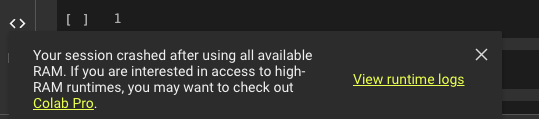

In [5]:
# configure service context
service_context = ServiceContext.from_defaults(

    chunk_size=1024,
    llm=llm,
    #embed_model="local"
)

NameError: name 'ServiceContext' is not defined

In [ ]:
index = VectorStoreIndex.from_documents(documents, service_context=service_context)